# Regresión lineal múltiple con el método OLS de Statsmodels.

Vamos a cargar un dataset que contiene información sobre los cargos del seguro médico, la edad, el sexo, el IMC, el número de hijos, el estado de fumador y la región. La cuestión es , ¿cuáles son los factores predictivos más influyentes en los gastos médicos de un asegurado? Para responder a esta cuestión llevaremos a cabo un análisis de regresión. (En nuestro ejemplo la variable dependiente son los cargos del seguro y las variables independientes son el resto de variables).

En primer lugar cargamos las librerias necesarias para manipular los datos.

In [1]:
import numpy as np

import pandas as pd
from scipy import stats
from statsmodels.compat import lzip
from sklearn import preprocessing



import statsmodels.api as sm 
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

import time
import sys

Cargamos nuestro data set y mostramos las cinco primeras líneas.

In [2]:
datos = pd.read_csv("./insurance.csv")
    
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Para realizar el análisis de regresión lineal, es necesario transformar antes las variables categóricas en numéricas
Es conveniente mencionar que cuando se utilizan variables artificiales, es importante no incluir una de las variables artificiales por variable categórica original. Es decir, dado que el campo región tenía cuatro categorías posibles, incluímos únicamente tres de ellas en el modelo, ya que la cuarta depende de las anteriores, y por tanto habría colinealidad entre los predictores, esto es, dependencia lineal (lo cual es conveniente evitar, pues esto supone que los datos predecidos por el modelo no sean fiables).

In [3]:
datos['sex'].replace({'female' : 0, 'male' : 1}, inplace= True)
datos['smoker'].replace({'no': 0, 'yes': 1}, inplace= True)
datos = pd.get_dummies(datos)
datos.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Ahora construímos dataframes  X e Y que contengan las variables independientes y dependientes respectivamente. En el dataframe X quitamos la columna 'charges', pues es la que queremos predecir, y 'region_northeast' para evitar que haya colinealidad.

In [4]:
#Variables independientes
X = datos.drop(['charges','region_northeast'], axis=1)
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


La variable dependiente, esto es, la que queremos predecir, son los cargos (columna'charges')

In [5]:
#Variables dependientes
Y = datos['charges']
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Finalmente, creamos el modelo de regresión mediante el método de los mínimos cuadrados (OLS)

In [6]:
t1=time.time()

In [7]:
# Creación del modelo
X1 = sm.add_constant(X)
mreg = sm.OLS(Y, X1)

# Ajuste del modelo
reg = mreg.fit()

/Users/lauraruizmartinez/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Estudiamos el tiempo dedicado a la creación y ajuste del modelo.

In [8]:
#Estudio tiempo de ejecucion

t2=time.time()
t_linregress = float(t2-t1)

print('Regresion lineal utilizando Statsmodels.OLS')
print("Tiempo de ejecucion: {} segundos".format(t_linregress))

Regresion lineal utilizando Statsmodels.OLS
Tiempo de ejecucion: 0.04940605163574219 segundos


In [9]:
# Medimos el tamaño en bytes del objeto
print(sys.getsizeof(reg), 'bytes')

56 bytes


Finalmente obtenemos los resultados de la regresión con la función reg.summary()

In [10]:
#Para conocer el resultado de la regresión
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:30:47   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
sex               -131.3144    332.945     -0.394      0.693    -784.470     521.842
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
smoker            2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Estudio de la multicolinearidad, test de normalidad y homocedasticidad

## - Multicolinealidad

Una de las técnicas más utilizadas para detectar multicolinealidad es medir los coeficientes de correlación entre pares de variables. Por encima de un 80% nos muestra que la correlación importante.

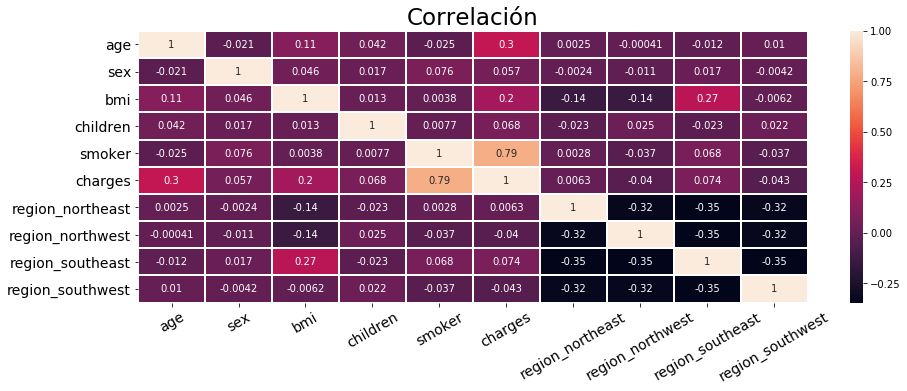

In [11]:
import seaborn as sns
fig, g = plt.subplots(figsize=(15, 5))
# mapa de calor
sns.heatmap(datos.corr(), annot=True, vmax=1, linewidths=1, ax = g);

# decoración
g.set_title('Correlación', fontsize = 23);

plt.yticks( rotation='horizontal', fontsize = 14);
plt.xticks( rotation='30', fontsize = 14);

No se aprecia una fuerte correlación (valores entre 0 y 1, 1: dependencia lineal perfecta; 1 :dependencia lineal nula ) entre ningún par de variables por lo que los niveles de multicolinealidad no son un problema.

## -Test de normalidad

El objetivo es estudiar si los residuos del modelo siguen una distribución normal. Una de las formas de llevar a cabo este estudio es mediante un gráfico de probabilidades. En el siguiente gráfico los residuos son los puntos azules, y deben estar en la línea roja para que sigan una distribución normal

Text(0.5, 1.0, 'Gráfica de residuos')

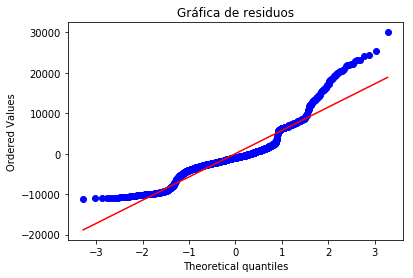

In [12]:
stats.probplot(reg.resid,plot = plt)
plt.title("Gráfica de residuos")

Tal y como se puede apreciar en la imágen, los residuos no están normalmente distribuídos. Cabe destacar que un análisis visual es subjetivo y por tanto no puede ser determinante. La forma más precisa por tanto es análisis teórico. En nuestro caso recurriremos al test de Kolmogorov-Smirnov, que determina la bondad de ajuste de dos distribuciones de probabilidad entre sí.

In [13]:
stats.kstest(reg.resid, 'norm')

KstestResult(statistic=0.6263077931301486, pvalue=0.0)

El resultado de este test indica que los residuos no están normalmente distribuídos.

## -Homocedasticidad

En regresión lineal el supuesto de homocedasticidad es fundamental. De violarse esta suposición, los errores estándar, los cuales se utilizan para calcular los intervalos de confianza. estarían sesgados, lo que conllevaría la pérdida de significancia del test.



Se puede llevar a cabo un análisis de homocedasticidad mediante diferentes estudios estadísticos.  En este ejemplo, realizaré la prueba de Bruesch-Pagan.

In [14]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(reg.resid, reg.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 121.74360137568986),
 ('p-value', 1.446717553918174e-22),
 ('f-value', 16.6286120273754),
 ('f p-value', 1.14560582463403e-23)]

El test indica que los datos violan el supuesto de homocedasticidad, es decir que los datos presentan heterodasticidad.

En este tipo de situaciones hay dos formas de proceder: Modificar las variables de forma adecuada o bien llevar a cabo un método de regresión robusto que tenga en cuenta la homocedasticidad

Con el fin de tener en cuenta la heteroscedasticidad en los datos, habría que seleccionar una matriz de covarianza consistente de heteroscedasticidad (HCCM) y pasarlo como argumento "cov_type ="  del método fit(). No obstante, pese a arriesgarnos a no obtener el grado de precisión óptimo, en este trabajo no tendremos en cuenta lo anterior, puesto que el objetivo principal es comparar unos métodos con otros.